In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
skstinfo = pd.read_csv("skstinfo.csv", header = None)
skstinfo = skstinfo[[0, 1, 2, 3]]
skstinfo = skstinfo.rename(columns = {0: "SKU", 1: "STORE", 2: "COST", 3: "RETAIL"})
skstinfo

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.00
1,3,103,123.36,440.00
2,3,104,123.36,440.00
3,3,202,123.36,440.00
4,3,203,123.36,440.00
...,...,...,...,...
39230141,9999997,2007,15.00,19.50
39230142,9999997,2707,15.00,9.75
39230143,9999997,3307,15.00,19.50
39230144,9999997,7507,15.00,19.50


In [6]:
store = skstinfo.groupby(["STORE"])["SKU"].nunique().reset_index()
store

,STORE,SKU
0,100,1325
1,102,183403
2,103,153457
3,104,57788
4,107,158686
...,...,...
352,9706,39719
353,9709,99274
354,9804,81300
355,9806,65090


In [7]:
store["SKU"].describe()

count       357.000000
mean     109888.364146
std       42828.243795
min           4.000000
25%       87460.000000
50%      114042.000000
75%      139171.000000
max      216061.000000
Name: SKU, dtype: float64

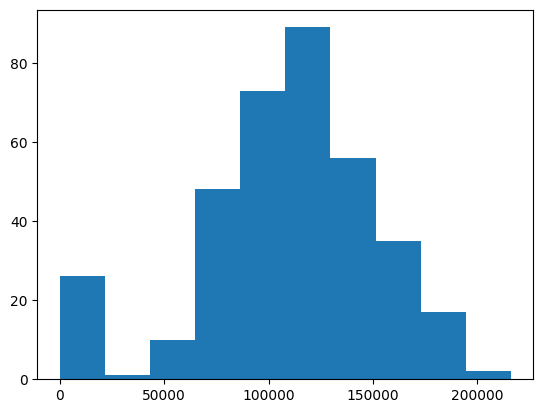

In [8]:
plt.hist(store["SKU"]);

In [9]:
sku = skstinfo.groupby(["SKU"])["STORE"].nunique().reset_index()
sku

,SKU,STORE
0,3,260
1,4,1
2,8,6
3,15,117
4,39,3
...,...,...
760207,9999973,6
760208,9999974,96
760209,9999991,103
760210,9999992,219


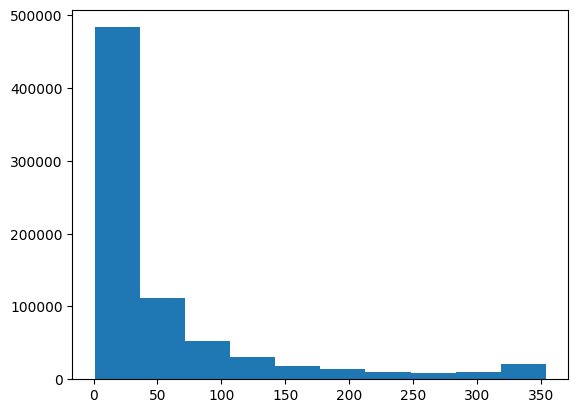

In [10]:
plt.hist(sku["STORE"]);

In [11]:
skstinfo.shape

(39230146, 4)

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
skstinfo.describe()

,SKU,STORE,COST,RETAIL
count,39230146.00,39230146.00,39230146.00,39230146.00
mean,4964063.22,4506.67,24.16,43.33
std,2871948.38,2803.19,40.57,83.92
min,3.00,100.00,0.00,0.00
25%,2500002.00,2203.00,9.00,12.99
50%,4921672.00,4207.00,15.36,24.50
75%,7441916.00,7007.00,26.76,45.00
max,9999997.00,9909.00,2700.00,6017.00


In [13]:
skstinfo.isnull().sum()

SKU       0
STORE     0
COST      0
RETAIL    0
dtype: int64

In [14]:
skstinfo["SKU"].value_counts()

6549436    354
4079531    354
579292     353
3097865    352
2289007    352
          ... 
3397384      1
3397396      1
4892185      1
8568412      1
3617133      1
Name: SKU, Length: 760212, dtype: int64

In [15]:
skstinfo["STORE"].value_counts()

2203    216061
8402    208661
9103    193535
209     192625
1709    188777
         ...  
300         14
400         14
500         14
5703         8
6803         4
Name: STORE, Length: 357, dtype: int64

In [16]:
skstinfo[["SKU", "STORE"]].value_counts()

SKU      STORE
3        102      1
6579128  4207     1
         4407     1
         4507     1
         4607     1
                 ..
3318247  807      1
         902      1
         1004     1
         1104     1
9999997  7907     1
Length: 39230146, dtype: int64

In [17]:
skstinfo[skstinfo["COST"] == 0]["SKU"].nunique()

3423

In [18]:
skstinfo[skstinfo["COST"] == 0]["RETAIL"].value_counts()

0.00      350340
0.01         419
0.25          70
15.00         67
14.99         57
           ...  
165.00         1
25.00          1
4.87           1
2.25           1
4.50           1
Name: RETAIL, Length: 100, dtype: int64

There are no null values, but there are 3423 SKU with COST equals to 0, but RETAIL not necessarily 0. 

In [19]:
np.corrcoef(skstinfo["COST"], skstinfo["RETAIL"])

NameError: name 'np' is not defined

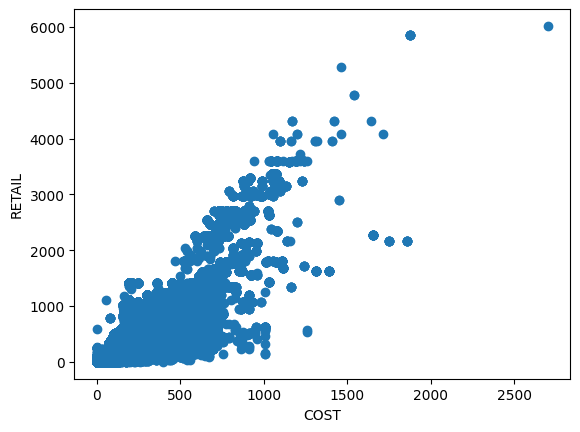

In [ ]:
plt.scatter(skstinfo["COST"], skstinfo["RETAIL"])
plt.xlabel("COST")
plt.ylabel("RETAIL");

In [ ]:
skstinfo["DIFF"] = skstinfo["RETAIL"] - skstinfo["COST"]
skstinfo

,SKU,STORE,COST,RETAIL,DIFF
0,3,102,123.36,440.00,316.64
1,3,103,123.36,440.00,316.64
2,3,104,123.36,440.00,316.64
3,3,202,123.36,440.00,316.64
4,3,203,123.36,440.00,316.64
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,4.50
39230142,9999997,2707,15.00,9.75,-5.25
39230143,9999997,3307,15.00,19.50,4.50
39230144,9999997,7507,15.00,19.50,4.50


In [ ]:
skstinfo["DIFF"].describe()

count   39230146.00
mean          19.17
std           50.91
min         -864.18
25%            1.10
50%            9.75
75%           25.00
max         3977.46
Name: DIFF, dtype: float64

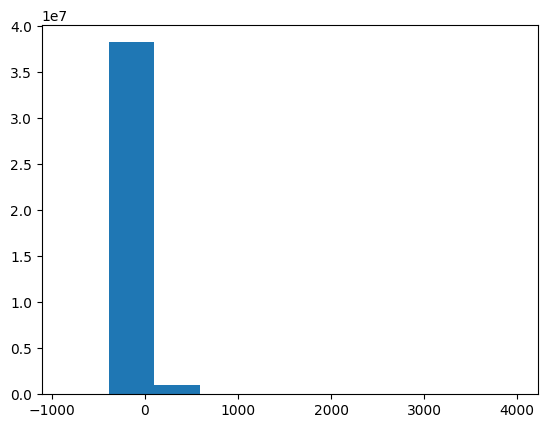

In [ ]:
plt.hist(skstinfo["DIFF"]);

In [22]:
strinfo = pd.read_csv("strinfo.csv", header = None, index_col = False, names = ["STORE", "CITY", "STATE", "ZIP"])
strinfo

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_9704/2212743107.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  strinfo = pd.read_csv("strinfo.csv", header = None, index_col = False, names = ["STORE", "CITY", "STATE", "ZIP"])


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


In [23]:
strinfo.shape

(453, 4)

In [24]:
strinfo.isnull().sum()

STORE    0
CITY     0
STATE    0
ZIP      0
dtype: int64

In [37]:
state_store = strinfo["STATE"].value_counts().reset_index()
state_store

,index,STATE
0,TX,79
1,FL,48
2,AR,27
3,AZ,26
4,OH,25
5,NC,24
6,LA,22
7,MO,20
8,TN,19
9,GA,16


In [38]:
state_store["STATE"].describe()

count   31.00
mean    14.61
std     15.81
min      1.00
25%      4.50
50%     10.00
75%     19.50
max     79.00
Name: STATE, dtype: float64

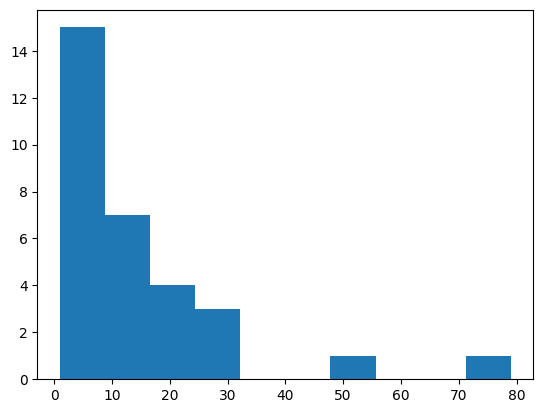

In [40]:
plt.hist(state_store["STATE"]);

In [42]:
states = pd.read_csv("states.csv")
states

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [45]:
strinfo = strinfo.merge(states, left_on = "STATE", right_on = "State Code")
strinfo

,STORE,CITY,STATE,ZIP,State,State Code,Region,Division
0,2,ST. PETERSBURG,FL,33710,Florida,FL,South,South Atlantic
1,102,TAMPA,FL,33607,Florida,FL,South,South Atlantic
2,202,TAMPA,FL,33612,Florida,FL,South,South Atlantic
3,302,TAMPA,FL,33625,Florida,FL,South,South Atlantic
4,402,BRANDON,FL,33511,Florida,FL,South,South Atlantic
...,...,...,...,...,...,...,...,...
448,7704,RICHMOND,VA,23235,Virginia,VA,South,South Atlantic
449,7804,GLEN ALLEN,VA,23060,Virginia,VA,South,South Atlantic
450,7904,RICHMOND,VA,23235,Virginia,VA,South,South Atlantic
451,8004,COLONIAL HEIGHTS,VA,23834,Virginia,VA,South,South Atlantic


In [46]:
strinfo["Region"].value_counts()

South        302
Midwest       74
West          72
Northeast      5
Name: Region, dtype: int64

In [47]:
strinfo["Division"].value_counts()

West South Central    143
South Atlantic        106
Mountain               64
East South Central     53
West North Central     44
East North Central     30
Pacific                 8
Middle Atlantic         5
Name: Division, dtype: int64